It's at the [MIAM](https://miam.org/) (Miam Musée International des Arts Modestes) in Sète, France, that I could for the first time experience really the [Dreamachine](https://en.wikipedia.org/wiki/Dreamachine). It's an optical system which consists of a central light which is periodically occluded by a rotating (cardboard?) cylinder. 

The magic of it is that the frequency of occlusion is around $12$ Hz, an important resonant state for sensory system. For the first time, I could really try it out at the MIAM - the important point being to close your lids and rest quiet while looking at the stroboscopic light source. Surprisingly, you see the emergence of "psychedelic patterns" (of course, less than in hippie's movies) yet of the order of the color pattern that may arise in [Benham's Disk](https://en.wikipedia.org/wiki/Fechner_color).

It's difficult to reproduce this pattern on a screen, yet it is still possible to give an *impression of it*. The goal is here :

* to generate a complex visual stimulation flickering on average at $12$ Hz

* to project it on a retinotopic space to maximise the "psychelic" effect

![retino_alpha](../files/2022-01-30-dreamachine/retino_alpha.gif)

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)
# https://docs.python.org/3/library/warnings.html#warning-filter
import warnings
warnings.simplefilter("ignore")

%load_ext autoreload
%autoreload 2

## a flickering motion cloud

A simple way to generate a flickering stimulus is to combine two sinusiods going in two opposite directions, following :

$$
\sin(\omega_x \cdot x + \omega_t \cdot v \cdot t) + \sin(\omega_x \cdot x - \omega_t \cdot v \cdot t) = 2\cdot \cos(\omega_x \cdot x) \cdot \cos(\omega_t \cdot v \cdot t)
$$


A first solution is to use an existing library for generating band-pass filtered noise, with a parameterization which fits well natural scenes:

https://github.com/NeuralEnsemble/MotionClouds/blob/master/MotionClouds/MotionClouds.py

In [2]:
import os
name = 'alpha'
DOWNSCALE = 2
import MotionClouds as mc

In [3]:
mc.figpath = '../files/2022-01-30-dreamachine'
os.makedirs(mc.figpath, exist_ok=True)

Let's explore parameters:

In [4]:
mc.envelope_gabor?

Signature:
mc.envelope_gabor(
    fx,
    fy,
    ft,
    V_X=1.0,
    V_Y=0.0,
    B_V=0.5,
    sf_0=0.125,
    B_sf=0.1,
    loggabor=True,
    theta=0.0,
    B_theta=0.19634954084936207,
    alpha=0.0,
    **kwargs,
)
Docstring:
Returns the Motion Cloud kernel, that is the product of:
    * a speed envelope
    * an orientation envelope
    * an orientation envelope
File:      ~/.local/lib/python3.9/site-packages/MotionClouds.py
Type:      function


To find that which will best will what we wish to do:

In [5]:
T_movie = 2.4 # period in seconds
fps = 60 # frames per second
sf_0 = 0.05 # spatial frequency per period
TF_0 = 12.  # peak temporal frequency
seed = 1234
N_X, N_Y, N_frame = 256//DOWNSCALE, 256//DOWNSCALE, int(T_movie*fps)
print(f'{N_X=}, {N_Y=}, {N_frame=}')

N_X=128, N_Y=128, N_frame=144


In [6]:
fx, fy, ft = mc.get_grids(N_X, N_Y, N_frame)

tf_0 = TF_0/fps # temporal frequency per period
V_X = tf_0 / sf_0
B_V = 0.12
theta = 0
B_theta = .1
print(f'{V_X=}, {sf_0=}, {tf_0=}')

V_X=4.0, sf_0=0.05, tf_0=0.2


In [7]:
z_1 = mc.envelope_gabor(fx, fy, ft, V_X=V_X, sf_0=sf_0, B_V=B_V, theta=theta, B_theta=B_theta)

In [8]:
name_ = name + '_1'
#mc.anim_save(movie_1, os.path.join(mc.figpath, name_))
mc.figures(z_1, name_, figpath=mc.figpath, seed=seed)
mc.in_show_video(name_, figpath=mc.figpath)

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-lib

In [9]:
z_2 = mc.envelope_gabor(fx, fy, ft, V_X=-V_X, sf_0=sf_0, B_V=B_V, theta=theta, B_theta=B_theta)
z_12 = z_1 + z_2
#movie_2 = mc.rectif(mc.random_cloud(z_2))
#movie_12 = mc.rectif(movie_1 + movie_2)

name_ = name + '_12'
#mc.anim_save(movie_12, os.path.join(mc.figpath, name_))
mc.figures(z_12, name_, figpath=mc.figpath, seed=seed)
mc.in_show_video(name_, figpath=mc.figpath)

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-lib

The combination of both wavec indeedd generates a flickering effect, but to increase it, let's make the wave more sinusoid-like by making the envelope more "tight":

In [10]:
tightness = 8.
z_1 = mc.envelope_gabor(fx, fy, ft, V_X=V_X, sf_0=sf_0, B_sf=0.1/tightness, B_V=B_V/tightness, theta=theta, B_theta=B_theta)
z_2 = mc.envelope_gabor(fx, fy, ft, V_X=-V_X, sf_0=sf_0, B_sf=0.1/tightness, B_V=B_V/tightness, theta=theta, B_theta=B_theta)

z_12 = z_1 + z_2

name_ = name + '_12_tight'
#mc.anim_save(movie_12, os.path.join(mc.figpath, name_))
mc.figures(z_12, name_, figpath=mc.figpath, seed=seed)
mc.in_show_video(name_, figpath=mc.figpath)

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-lib


This indeed looks better, but we may also follow a simpler route by generating our custom envelope.

## custom cloud


Let's inspire us by the function which defines the enveloppe :

In [11]:
mc.frequency_radius?

Signature: mc.frequency_radius(fx, fy, ft, ft_0=inf, clean_division=False)
Docstring:
Returns the frequency radius. To see the effect of the scaling factor run
'test_color.py'
File:      ~/.local/lib/python3.9/site-packages/MotionClouds.py
Type:      function


and to define a custom one 

In [12]:
tf_0

0.2

In [13]:
ft.min(), ft.max()

(-0.5, 0.4930555555555556)

In [14]:
B_sf = .05
B_tf = .1
B_theta = .1
theta = np.pi*(3 - np.sqrt(5)) # https://en.wikipedia.org/wiki/Golden_angle


In [15]:
def envelope_alpha(fx, fy, ft, tf_0=tf_0, B_tf=B_tf, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta):
    #f_radius = mc.frequency_radius(fx, fy, ft, ft_0=1.0, clean_division=True)    
    ft_ = ft + 1.0*(ft==0.) # to avoid numerical errors
    #env = 1./np.abs(ft_)*np.exp(-.5*(np.log((ft_/tf_0)**2))/((np.log((tf_0+B_tf)/tf_0))**2))    
    env = np.exp(-.5*(ft_-tf_0)**2/B_tf**2)    
    env *= mc.envelope_orientation(fx, fy, ft, theta=theta, B_theta=B_theta)
    env *= mc.envelope_radial(fx, fy, ft, sf_0=sf_0, B_sf=B_sf)
        
    return env

In [16]:
z_pure = envelope_alpha(fx, fy, ft, tf_0=tf_0, B_tf=B_tf, B_sf=B_sf, theta=theta, B_theta=B_theta)

name_ = name + '_pure'
mc.figures(z_pure, name_, figpath=mc.figpath, recompute=True, seed=seed)
mc.in_show_video(name_, figpath=mc.figpath)

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-lib

## retinotopic mapping

We can directly acess the movie as a 3D `ndarray`:

In [17]:
movie_pure = mc.rectif(mc.random_cloud(z_pure, seed=seed))

One may want to project it on retinotopic coordinates to give a psychedelic effect...

Following [this answer](https://stackoverflow.com/a/49630831/234547), it's pretty easy to take one image and to project it to a retinotopic map. In our case, there are no color, so it's even easier...

In [18]:
movie_pure_ = np.zeros((movie_pure.shape[0], movie_pure.shape[1]+1, movie_pure.shape[2]))
movie_pure_[:, :-1, :] = movie_pure
movie_pure_[:, -1, :] = movie_pure[:, 0, :]
movie_pure = movie_pure_

In [19]:
# get coordinates of boxes in the mesh :
phi = np.linspace(0, 2*np.pi, movie_pure.shape[1])
r = np.linspace(0, 1, movie_pure.shape[0])
Phi, R = np.meshgrid(phi, r)

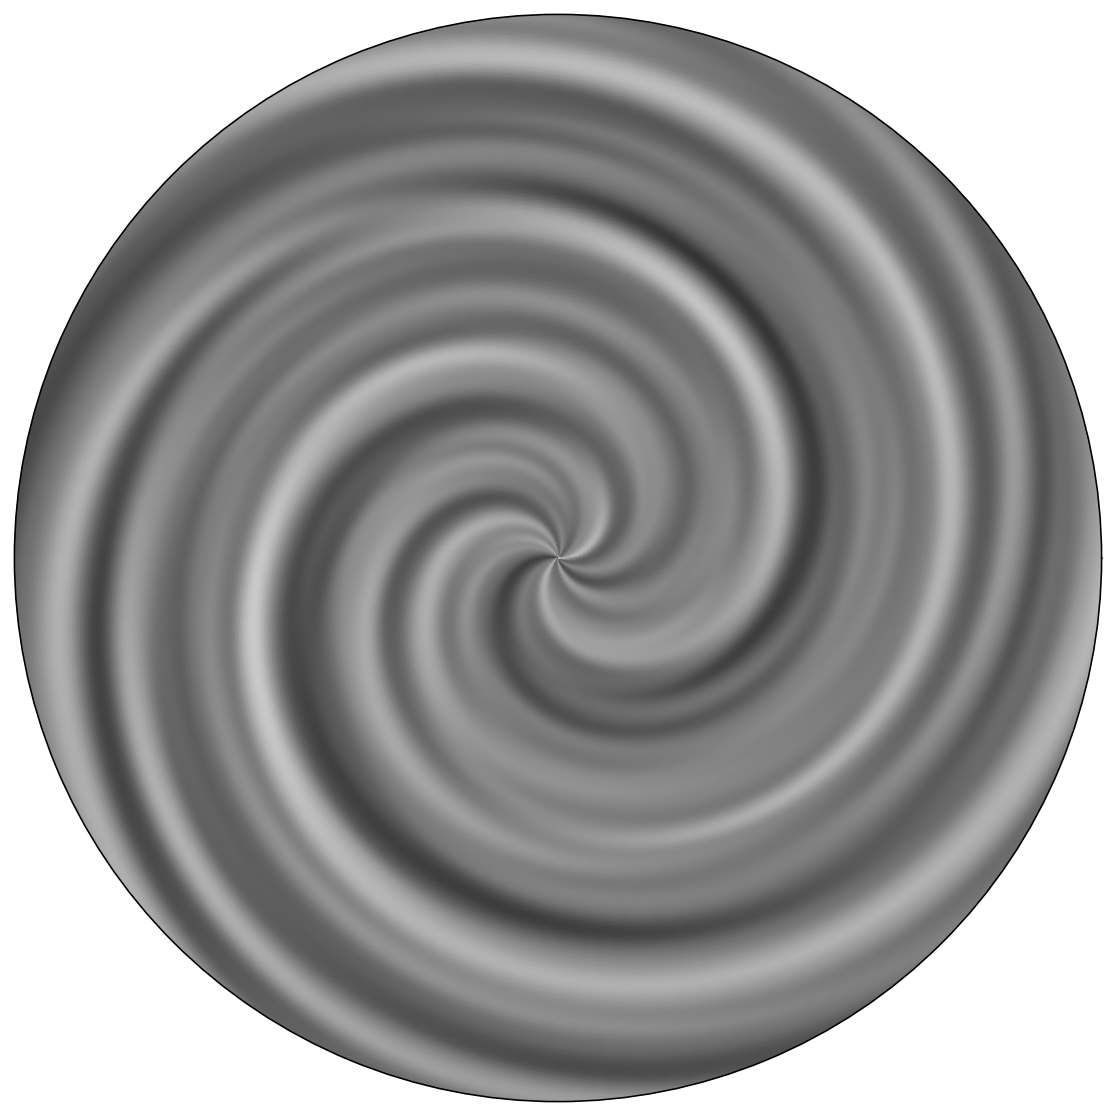

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width), subplot_kw=dict(polar=True))
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html
# https://matplotlib.org/devdocs/gallery/images_contours_and_fields/pcolormesh_grids.html
m = ax.pcolormesh(Phi, R, movie_pure[:, :, 0], shading='gouraud', vmin=movie_pure.min(), vmax=movie_pure.max(), 
                  edgecolors='none', linewidth=0, cmap=plt.gray())
ax.set_xticks([])
ax.set_yticks([]);

Let's sature the grayscale values to give it a more natural look:

In [21]:
movie_pure_bw = np.tanh(2*movie_pure)

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width), subplot_kw=dict(polar=True))
#fig.subplots_adjust(bottom=0.4, left=.3, right=0.6, top=0.6);
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html
# https://matplotlib.org/devdocs/gallery/images_contours_and_fields/pcolormesh_grids.html
m = ax.pcolormesh(Phi, R, movie_pure_bw[:, :, 0], shading='gouraud', 
                  vmin=movie_pure_bw.min(), vmax=movie_pure_bw.max(), 
                  edgecolors='none', cmap=plt.gray())
#ax.margins(y=-0.2)
ax.set_xticks([])
ax.set_yticks([]);

## DREAMACHINE videos

Following a [previous post](https://laurentperrinet.github.io/sciblog/posts/2019-10-07-neurostories-videos-of-my-talk.html), we can make a one-cell code to create and display the video (see also the [doc](https://zulko.github.io/moviepy/getting_started/working_with_matplotlib.html#simple-matplotlib-example)):

In [23]:
T_movie, fps

(2.4, 60)

In [24]:
%pip install pyglet

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install -U moviepy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:

W, H = 1600, 1000
def make_gif(gifname, fnames, fps):
    import imageio

    with imageio.get_writer(gifname, mode='I', fps=fps) as writer:
        for fname in fnames:
            writer.append_data(imageio.imread(fname))

    from pygifsicle import optimize
    optimize(str(gifname))
    return gifname

import moviepy.editor as mpy
import moviepy.video.io.ImageSequenceClip
def make_mp4(moviename, fnames, fps):
    # https://github.com/Zulko/moviepy/blob/master/moviepy/video/VideoClip.py#L199
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(fnames, fps=fps)
    clip.write_videofile(moviename, codec='libx264')#, audio_codec='aac') # , codec="mpeg4" libx264
    return moviename


In [27]:
%matplotlib agg


In [28]:
from tqdm.notebook import trange

def make_shots(figname, r = 16,
                 B_tf = .1,
                 B_sf = .05,
                 B_theta = .1,
                 theta = np.pi*(3 - np.sqrt(5)), # https://en.wikipedia.org/wiki/Golden_angle                 
                 T_movie = T_movie,
                 slope = 2.,
                 fps = fps,
                 cache_path='/tmp',
                 W=W, H=H):
    

    z_pure = envelope_alpha(fx, fy, ft, tf_0=tf_0, B_tf=B_tf, B_sf=B_sf, theta=theta, B_theta=B_theta)
    movie_pure = mc.rectif(mc.random_cloud(z_pure))
    movie_pure_ = np.zeros((movie_pure.shape[0], movie_pure.shape[1]+1, movie_pure.shape[2]))
    movie_pure_[:, :-1, :] = movie_pure
    movie_pure_[:, -1, :] = movie_pure[:, 0, :]
    movie_pure = movie_pure_

    # get coordinates of boxes in the mesh :
    phi = np.linspace(0, 2*np.pi, movie_pure.shape[1])
    r = np.linspace(0, 1, movie_pure.shape[0])
    Phi, R = np.meshgrid(phi, r)
    movie_pure_bw = np.tanh(slope*movie_pure)
    
    import matplotlib
    ppi = 72.27 # (constant) definition of the ppi = points per inch
    inches_per_pt = 1.0/ppi  # Convert pt to inches
    #inches_per_cm = 1./2.54
    figwidth = W*inches_per_pt  # width in inches
    subplotpars = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0., hspace=0.,)
    fnames = []
    figname_ = figname.split('/')[-1]

    for t in trange(movie_pure.shape[2]):
        fname = f'{cache_path}/{figname_}_{t}.png'

        fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width), subplot_kw=dict(polar=True))
        m = ax.pcolormesh(Phi, R, movie_pure[:, :, t], shading='gouraud', vmin=movie_pure.min(), vmax=movie_pure.max(), 
                      edgecolors='none', cmap="Spectral")
        ax.set_xticks([])
        ax.set_yticks([])        
        fig.savefig(fname, dpi=ppi)
        
        fnames.append(fname)

    make_mp4(figname, fnames, fps=fps)
    gifname = make_gif(figname.replace('.mp4', '.gif'), fnames, fps=fps)
    for fname in fnames: os.remove(fname)    
    return figname # returns filename

figname = os.path.join(mc.figpath, 'retino_alpha.mp4')
if True: #not os.path.isfile(figname): 
    figname = make_shots(figname)

  0%|          | 0/144 [00:00<?, ?it/s]

Moviepy - Building video ../files/2022-01-30-dreamachine/retino_alpha.mp4.
Moviepy - Writing video ../files/2022-01-30-dreamachine/retino_alpha.mp4



Moviepy - Done !
Moviepy - video ready ../files/2022-01-30-dreamachine/retino_alpha.mp4


In [29]:
clip = mpy.VideoFileClip(figname)
clip.ipython_display(fps=fps, autoplay=True, loop=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## some book keeping for the notebook

In [30]:
%pwd

'/home/laurent/metagit/blog/sciblog/posts'

In [31]:
mc.figpath

'../files/2022-01-30-dreamachine'

In [32]:
%ls -ltr {mc.figpath}

total 24440
-rw-rw-r-- 1 laurent laurent    25405 Feb 12 18:34 alpha_1.png
-rw-rw-r-- 1 laurent laurent   219708 Feb 12 18:34 alpha_1_cube.png
-rw-rw-r-- 1 laurent laurent    38455 Feb 12 18:34 alpha_1.mp4
-rw-rw-r-- 1 laurent laurent    29527 Feb 12 18:34 alpha_12.png
-rw-rw-r-- 1 laurent laurent   216606 Feb 12 18:34 alpha_12_cube.png
-rw-rw-r-- 1 laurent laurent    74232 Feb 12 18:34 alpha_12.mp4
-rw-rw-r-- 1 laurent laurent    16621 Feb 12 18:34 alpha_12_tight.png
-rw-rw-r-- 1 laurent laurent   208114 Feb 12 18:34 alpha_12_tight_cube.png
-rw-rw-r-- 1 laurent laurent    59821 Feb 12 18:34 alpha_12_tight.mp4
-rw-rw-r-- 1 laurent laurent    57228 Feb 12 18:34 alpha_pure.png
-rw-rw-r-- 1 laurent laurent   245849 Feb 12 18:34 alpha_pure_cube.png
-rw-rw-r-- 1 laurent laurent   125233 Feb 12 18:34 alpha_pure.mp4
-rw-rw-r-- 1 laurent laurent   942517 Feb 12 18:35 retino_alpha.mp4
-rw-rw-r-- 1 laurent laurent 22736896 Feb 12 18:36 retino_alpha.gif


In [33]:
%rm __temp__.mp4

In [34]:
%pip install watermark

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [35]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.25.0

numpy     : 1.21.4
matplotlib: 3.5.0
scipy     : 1.7.3
pillow    : not installed
imageio   : 2.13.1

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.13.0-28-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Hostname: paul-iMac

Git hash: 7906ceab6350eddbbf4903b4c6454cd44eb061c7

Git repo: https://github.com/laurentperrinet/sciblog

Git branch: master

